# Machine Learning - Gender Data
In this protfolio project the focus is on identifying the gender of a given example datatset (from kaggle) with numeric features. The dataset is already cleaned and ready for ML.
The focus is on identifying the best ftting supervised ML algorithm from sklearn. After identifying the best default algorithm, we are going to optimize the default parameter to improve the fitting.

In [396]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 1. Preparations
After importing the csv data, we encode the label column 'gender' for our ML algorithms. After that we are spliiting the dataset into train and test data for supervised learning.

In [480]:
df = pd.read_csv("./data/gender_classification.csv") 
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [482]:
#encoding

le = LabelEncoder()
df['gender2'] = le.fit_transform(df['gender'])
df = df.drop('gender', axis=1)
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender2
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [484]:
# Split dataset

X = df.drop('gender2', axis=1)
y = df['gender2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 2. ML Models 

### 2.1. Decision Tree
First, we use the DecisionTree algorithm, fit the train data and predict the label values for the test data sample (X_test). After that a classification report and a confusion matrix is created.

In [123]:
#DecisionTree Algorithm

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predict_dtree = dtree.predict(X_test)

Accuracy: 0.957
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       808
           1       0.96      0.95      0.96       843

    accuracy                           0.96      1651
   macro avg       0.96      0.96      0.96      1651
weighted avg       0.96      0.96      0.96      1651



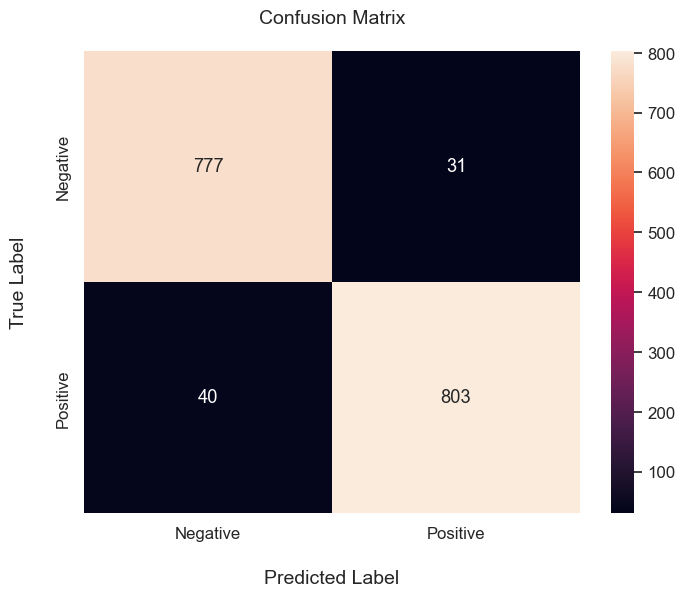

In [476]:
# Valuation DecisionTree

cr_dtree = classification_report(y_test, predict_dtree)
cr_dtree_d = classification_report(y_test, predict_dtree,output_dict=True)
cf_dtree = confusion_matrix(y_test,predict_dtree)
ac_dtree = round(accuracy_score(y_test, predict_dtree),3)

print(f'Accuracy: {ac_dtree}')
print(cr_dtree)
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(cf_dtree, annot=True, fmt='d', )
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_ylabel("True Label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_title("Confusion Matrix", fontsize=14, pad=20)
plt.show()

### 2.2. Logistic Regression
Next, we use the Logistic Regression algorithm and proceed like above.

In [129]:
#LogisticRegression Algorithm

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
predict_log_model = log_model.predict(X_test)

Accuracy: 0.961
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       808
           1       0.96      0.96      0.96       843

    accuracy                           0.96      1651
   macro avg       0.96      0.96      0.96      1651
weighted avg       0.96      0.96      0.96      1651



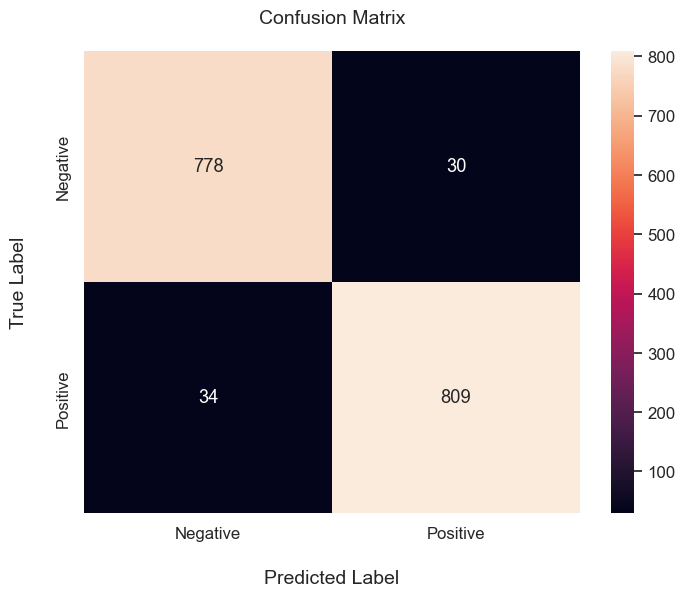

In [474]:
# Print Valuation DecisionTree

cr_log_model = classification_report(y_test, predict_log_model)
cr_log_model_d = classification_report(y_test, predict_log_model, output_dict=True)
cf_log_model = confusion_matrix(y_test,predict_log_model)
ac_log_model = round(accuracy_score(y_test, predict_log_model),3)

print(f'Accuracy: {ac_log_model}')
print(cr_log_model)
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(cf_log_model, annot=True, fmt='d', )
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_ylabel("True Label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_title("Confusion Matrix", fontsize=14, pad=20)
plt.show()

### 2.3. KNearestNeighbor
The third ML algorithm is KNearestNeighbor. Before using it, we scale the numeric features with 
- the Standard Scaler
- and the MinMax Scaler

We create new scaled test data with identical sample size and random state for a fair comparison. As there are only two possible label_values (male,female) we set the n_neighbors value = 1.

In [470]:
# KNN with StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [472]:
# StandardScaler test data

df_scaled = pd.DataFrame(scaled_features,columns=X.columns)
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(df_scaled, y, test_size=0.33, random_state=42)

df_scaled.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,0.387194,-1.247933,0.283971,1.012273,-1.015924,1.013894,1.002202
1,-2.582682,0.739389,-1.009418,-0.987876,-1.015924,1.013894,-0.997803
2,-2.582682,-1.247933,0.653511,1.012273,0.984326,1.013894,1.002202
3,-2.582682,1.100720,0.283971,-0.987876,0.984326,1.013894,1.002202
4,0.387194,0.287725,-0.085568,-0.987876,-1.015924,-0.986297,-0.997803


In [317]:
#KNN Algorithm

knn_ss = KNeighborsClassifier(n_neighbors=1)
log_model.fit(X_train_ss, y_train_ss)
predict_knn_ss = log_model.predict(X_test_ss)

Accuracy: 0.961
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       808
           1       0.96      0.96      0.96       843

    accuracy                           0.96      1651
   macro avg       0.96      0.96      0.96      1651
weighted avg       0.96      0.96      0.96      1651



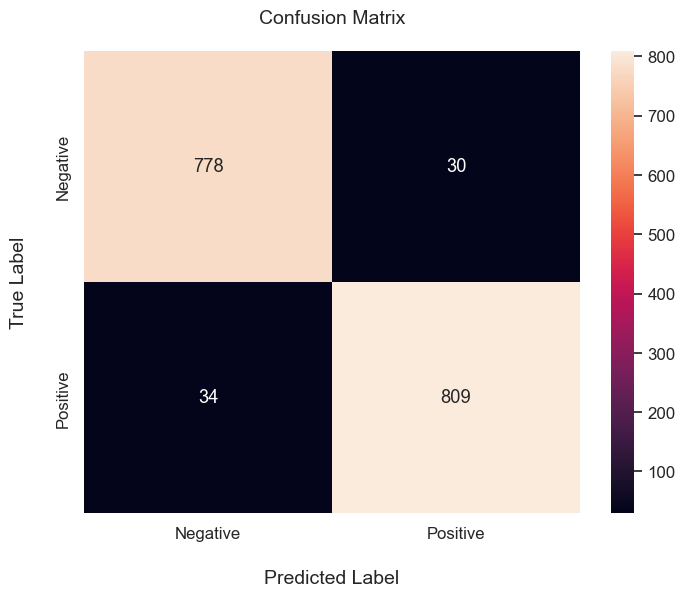

In [384]:
# Print Valuation KNN_ss

cr_knn_ss = classification_report(y_test, predict_knn_ss)
cr_knn_ss_d = classification_report(y_test, predict_knn_ss, output_dict=True)
cf_knn_ss = confusion_matrix(y_test,predict_knn_ss)
ac_knn_ss = round(accuracy_score(y_test, predict_knn_ss),3)

print(f'Accuracy: {ac_knn_ss}')
print(cr_knn_ss)

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(cf_knn_ss, annot=True, fmt='d', )
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_ylabel("True Label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_title("Confusion Matrix", fontsize=14, pad=20)
plt.show()

In [386]:
# KNN with MinMax

scaler_minmax = MinMaxScaler()
scaled_features_minmax = scaler_minmax.fit_transform(X)

In [388]:
# MinMaxScaler test data

df_scaled_minmax = pd.DataFrame(scaled_features_minmax,columns=X.columns)
X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(df_scaled_minmax, y, test_size=0.33, random_state=42)

df_scaled_minmax.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1.0,0.097561,0.50,1.0,0.0,1.0,1.0
1,0.0,0.634146,0.15,0.0,0.0,1.0,0.0
2,0.0,0.097561,0.60,1.0,1.0,1.0,1.0
3,0.0,0.731707,0.50,0.0,1.0,1.0,1.0
4,1.0,0.512195,0.40,0.0,0.0,0.0,0.0


In [466]:
#KNN Algorithm with MinMax

knn_mm = KNeighborsClassifier(n_neighbors=1)
log_model.fit(X_train_mm, y_train_mm)
predict_knn_mm = log_model.predict(X_test_mm)

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       808
           1       0.96      0.96      0.96       843

    accuracy                           0.96      1651
   macro avg       0.96      0.96      0.96      1651
weighted avg       0.96      0.96      0.96      1651



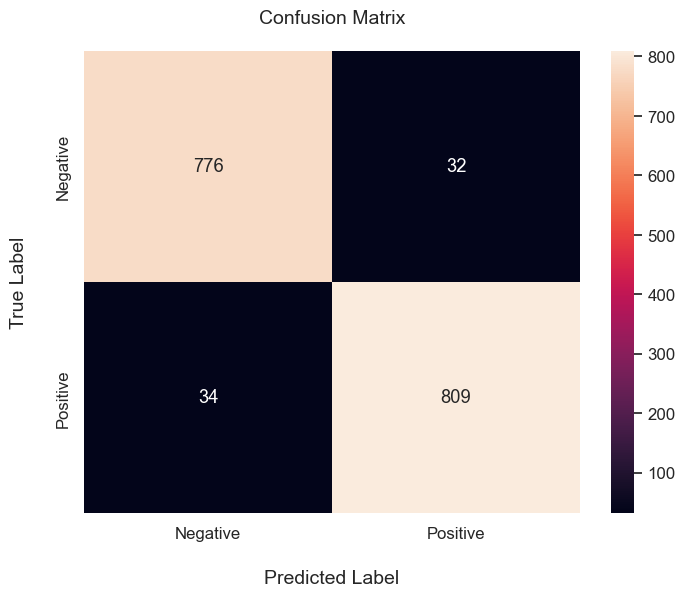

In [468]:
# Print Valuation KNN_mm

cr_knn_mm = classification_report(y_test, predict_knn_mm)
cr_knn_mm_d = classification_report(y_test, predict_knn_mm, output_dict=True)
cf_knn_mm = confusion_matrix(y_test,predict_knn_mm)
ac_knn_mm = round(accuracy_score(y_test, predict_knn_mm),3)

print(f'Accuracy: {ac_knn_mm}')
print(cr_knn_mm)
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(cf_knn_mm, annot=True, fmt='d', )
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_ylabel("True Label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_title("Confusion Matrix", fontsize=14, pad=20)
plt.show()

### 2.4. Naive Bayes
The last ML algorithm for this supervised ML project is the Naive Bayes algorithm. We use
- the Gaussian Naive Bayes, which is better for continouos values, with the Standard Scaler fitting
- and the Multinominal Naive Bayes model, which is better for discret values, with the MinMax Scaler test data

In [207]:
#Naive Bayes Gaussian 

gnb_ss = GaussianNB()
gnb_ss.fit(X_train_ss, y_train_ss)
predict_gnb_ss = gnb_ss.predict(X_test_ss)

Accuracy: 0.963
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       808
           1       0.96      0.96      0.96       843

    accuracy                           0.96      1651
   macro avg       0.96      0.96      0.96      1651
weighted avg       0.96      0.96      0.96      1651



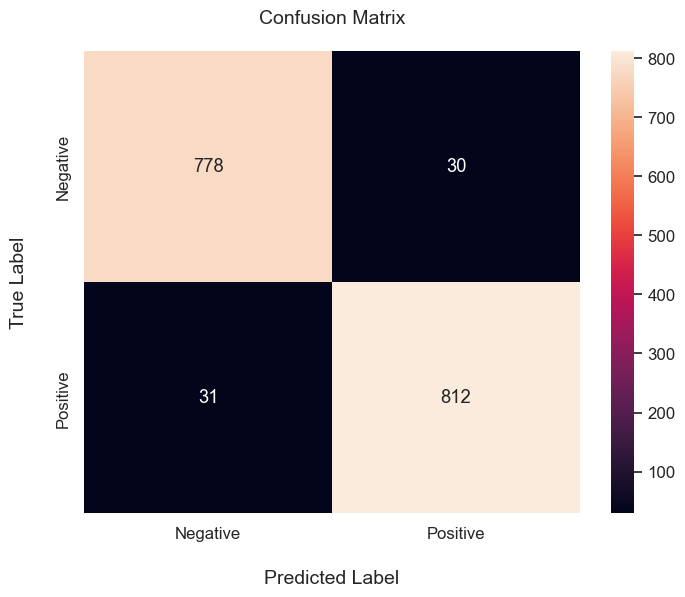

In [392]:
# Print Valuation GNB_ss

cr_gnb_ss = classification_report(y_test, predict_gnb_ss)
cr_gnb_ss_d = classification_report(y_test, predict_gnb_ss, output_dict=True)
cf_gnb_ss = confusion_matrix(y_test,predict_gnb_ss)
ac_gnb_ss = round(accuracy_score(y_test, predict_gnb_ss),3)

print(f'Accuracy: {ac_gnb_ss}')
print(cr_gnb_ss)
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(cf_gnb_ss, annot=True, fmt='d', )
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_ylabel("True Label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_title("Confusion Matrix", fontsize=14, pad=20)
plt.show()

In [213]:
#Naive Bayes Multinominal 

mnb_mm = GaussianNB()
mnb_mm.fit(X_train_mm, y_train_mm)
predict_mnb_mm = mnb_mm.predict(X_test_mm)

Accuracy: 0.963
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       808
           1       0.96      0.96      0.96       843

    accuracy                           0.96      1651
   macro avg       0.96      0.96      0.96      1651
weighted avg       0.96      0.96      0.96      1651



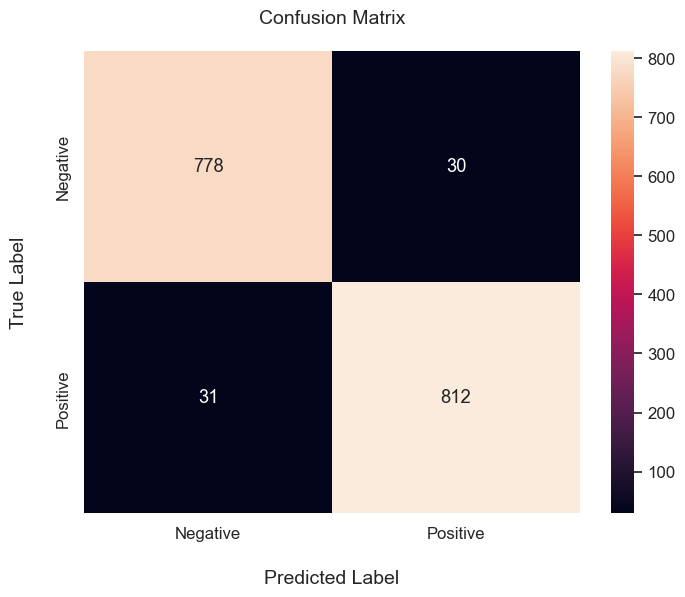

In [394]:
# Print Valuation GNB_ss

cr_mnb_mm = classification_report(y_test, predict_mnb_mm)
cr_mnb_mm_d = classification_report(y_test, predict_mnb_mm, output_dict=True)
cf_mnb_mm = confusion_matrix(y_test,predict_mnb_mm)
ac_mnb_mm = round(accuracy_score(y_test, predict_mnb_mm),3)

print(f'Accuracy: {ac_mnb_mm}')
print(cr_mnb_mm)

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(cf_mnb_mm, annot=True, fmt='d', )
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_ylabel("True Label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_title("Confusion Matrix", fontsize=14, pad=20)
plt.show()

## 2.5. Results of Model Evaluation
Given the 6 results of the different models we can identify the best fitting model for this data set. But first we pack all results into a dataframe for better comparison and visualisation.

Note: As all models of the sklearn library follow nearly identical code, we could have created a for loop to avoid duplicated and nearly identical code, but a step-by-step approach is easier to understand and IMHO better suited for this show case.

In [464]:
# Create result dataframe

results = pd.DataFrame(columns=['Model','Accuracy','True Negatives','False Negatives','False Positives','True Positives','Precision 0','Recall 0','F1-Score 0','Precision 1','Recall 1','F1-Score 1'])

models = ['DecisionTree', 'LogisticRegression', 'KNN_StnadardScaler', 'KNN_MinMaxScaler', 'NaiveBayes_Gaussian_StandardScaler','NaiveBayes_Multinominal_MinMax_Scaler']
crs = [cr_dtree_d, cr_log_model_d, cr_knn_ss_d, cr_knn_mm_d, cr_gnb_ss_d, cr_mnb_mm_d]
cfs = [cf_dtree, cf_log_model, cf_knn_ss, cf_knn_mm, cf_gnb_ss, cf_mnb_mm]
acs = [ac_dtree, ac_log_model, ac_knn_ss, ac_knn_mm, ac_gnb_ss, ac_mnb_mm]

for i in range(0, len(models)):
    results.loc[i,'Model'] = models[i]
    
    results.loc[i,'Accuracy'] = acs[i]
    
    results.loc[i,'True Negatives']=cfs[i][0][0]
    results.loc[i,'False Negatives']=cfs[i][0][1]
    results.loc[i,'False Positives']=cfs[i][1][0]
    results.loc[i,'True Positives']=cfs[i][1][1]

    results.loc[i,'Precision 0']=round(crs[i]['0']['precision'],2)
    results.loc[i,'Recall 0']=round(crs[i]['0']['recall'],2)
    results.loc[i,'F1-Score 0']=round(crs[i]['0']['f1-score'],2)

    results.loc[i,'Precision 1']=round(crs[i]['1']['precision'],2)
    results.loc[i,'Recall 1']=round(crs[i]['1']['recall'],2)
    results.loc[i,'F1-Score 1']=round(crs[i]['1']['f1-score'],2)

results.head(6)
                    

,Model,Accuracy,True Negatives,False Negatives,False Positives,True Positives,Precision 0,Recall 0,F1-Score 0,Precision 1,Recall 1,F1-Score 1
0,DecisionTree,0.957,777,31,40,803,0.95,0.96,0.96,0.96,0.95,0.96
1,LogisticRegression,0.961,778,30,34,809,0.96,0.96,0.96,0.96,0.96,0.96
2,KNN_StnadardScaler,0.961,778,30,34,809,0.96,0.96,0.96,0.96,0.96,0.96
3,KNN_MinMaxScaler,0.96,776,32,34,809,0.96,0.96,0.96,0.96,0.96,0.96
4,NaiveBayes_Gaussian_StandardScaler,0.963,778,30,31,812,0.96,0.96,0.96,0.96,0.96,0.96
5,NaiveBayes_Multinominal_MinMax_Scaler,0.963,778,30,31,812,0.96,0.96,0.96,0.96,0.96,0.96


## 3. ML Model optimization
The model valuation shows, that for the given dataset, the NaiveBayes model gives the most accurate solution in the default configuration. The differences between the Gaussian and the multinominal model are non existence. Therefore we are going to proceed with the Gaussian model.

In this step we try to find parameters to optimize the accuracy and precision of the Gaussian model with the StandardScaler fitting.

In [374]:
# Show ML model params

GaussianNB().get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [443]:
# Classifier construction

gnb_classifier = GaussianNB()

params_gnb = {'var_smoothing': np.logspace(0,-9, num=100)}

In [445]:
# Accuracy optimization

gs_gnb = GridSearchCV(estimator=gnb_classifier, 
                 param_grid=params_gnb, 
                 cv=7,  
                 verbose=1, 
                 scoring='accuracy') 
gs_gnb.fit(X_train_ss, y_train_ss)

gs_gnb.best_params_

Fitting 7 folds for each of 100 candidates, totalling 700 fits


{'var_smoothing': 0.43287612810830584}

In [447]:
# Precision optimization

gs_gnb_2 = GridSearchCV(estimator=gnb_classifier, 
                 param_grid=params_gnb, 
                 cv=7,  
                 verbose=1, 
                 scoring='precision') 
gs_gnb_2.fit(X_train_ss, y_train_ss)

gs_gnb_2.best_params_

Fitting 7 folds for each of 100 candidates, totalling 700 fits


{'var_smoothing': 1.0}

In [455]:
#Naive Bayes Gaussian with var_smoothing_1 for accuracy

gnb_ss_1 = GaussianNB(var_smoothing=0.43287612810830584)
gnb_ss_1.fit(X_train_ss, y_train_ss)
predict_gnb_ss_1 = gnb_ss_1.predict(X_test_ss)

Accuracy: 0.969
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       808
           1       0.98      0.96      0.97       843

    accuracy                           0.97      1651
   macro avg       0.97      0.97      0.97      1651
weighted avg       0.97      0.97      0.97      1651



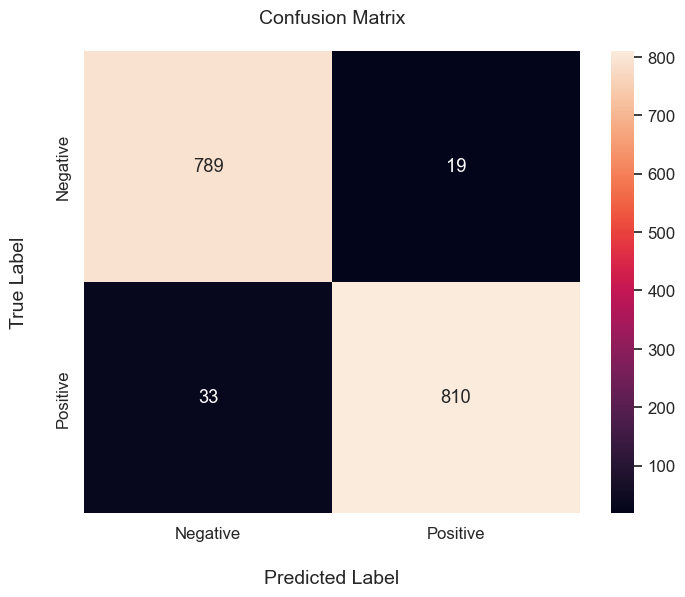

In [457]:
# Print Valuation GNB_ss_1

cr_gnb_ss_1 = classification_report(y_test, predict_gnb_ss_1)
cr_gnb_ss_1_d = classification_report(y_test, predict_gnb_ss_1, output_dict=True)
cf_gnb_ss_1 = confusion_matrix(y_test,predict_gnb_ss_1)
ac_gnb_ss_1 = round(accuracy_score(y_test, predict_gnb_ss_1),3)

print(f'Accuracy: {ac_gnb_ss_1}')
print(cr_gnb_ss_1)
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(cf_gnb_ss_1, annot=True, fmt='d', )
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_ylabel("True Label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_title("Confusion Matrix", fontsize=14, pad=20)
plt.show()

In [418]:
#Naive Bayes Gaussian with var_smoothing_2 for precision

gnb_ss_2 = GaussianNB(var_smoothing=1)
gnb_ss_2.fit(X_train_ss, y_train_ss)
predict_gnb_ss_2 = gnb_ss_2.predict(X_test_ss)

Accuracy: 0.967
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       808
           1       0.98      0.96      0.97       843

    accuracy                           0.97      1651
   macro avg       0.97      0.97      0.97      1651
weighted avg       0.97      0.97      0.97      1651



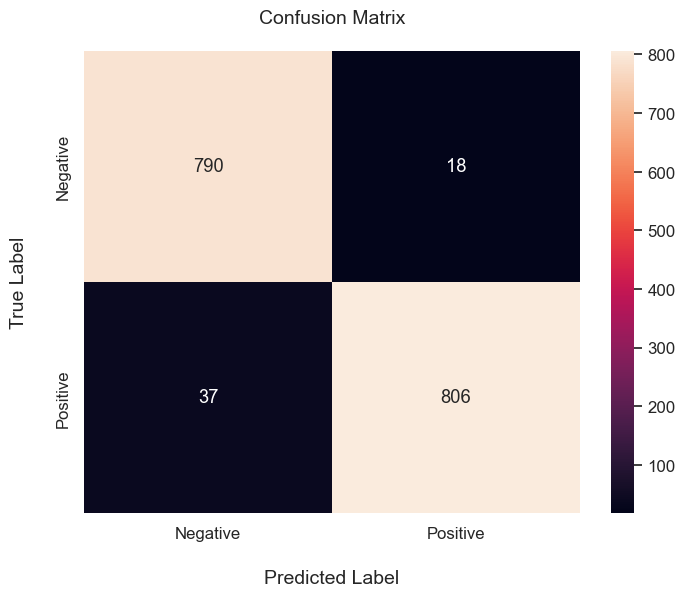

In [420]:
# Print Valuation GNB_ss_2

cr_gnb_ss_2 = classification_report(y_test, predict_gnb_ss_2)
cr_gnb_ss_2_d = classification_report(y_test, predict_gnb_ss_2, output_dict=True)
cf_gnb_ss_2 = confusion_matrix(y_test,predict_gnb_ss_2)
ac_gnb_ss_2 = round(accuracy_score(y_test, predict_gnb_ss_2),3)

print(f'Accuracy: {ac_gnb_ss_2}')
print(cr_gnb_ss_2)
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(cf_gnb_ss_2, annot=True, fmt='d', )
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_ylabel("True Label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_title("Confusion Matrix", fontsize=14, pad=20)
plt.show()

In [462]:
#Create result dataframe for new optimized ML models

results_opt = pd.DataFrame(columns=['Model','Accuracy','True Negatives','False Negatives','False Positives','True Positives','Precision 0','Recall 0','F1-Score 0','Precision 1','Recall 1','F1-Score 1'])

models_opt = [ 'NaiveBayes_Gaussian_StandardScaler', 'NaiveBayes_Gaussian_StandardScaler_Accuracy', 'NaiveBayes_Gaussian_StandardScaler_Precision']
crs_opt = [cr_gnb_ss_d,cr_gnb_ss_1_d,cr_gnb_ss_2_d]
cfs_opt = [cf_gnb_ss, cf_gnb_ss_1, cf_gnb_ss_2]
acs_opt = [ac_gnb_ss, ac_gnb_ss_1,ac_gnb_ss_2]

for i in range(0, len(models_opt)):
    results_opt.loc[i,'Model'] = models_opt[i]
    
    results_opt.loc[i,'Accuracy'] = acs_opt[i]
    
    results_opt.loc[i,'True Negatives']=cfs_opt[i][0][0]
    results_opt.loc[i,'False Negatives']=cfs_opt[i][0][1]
    results_opt.loc[i,'False Positives']=cfs_opt[i][1][0]
    results_opt.loc[i,'True Positives']=cfs_opt[i][1][1]

    results_opt.loc[i,'Precision 0']=round(crs_opt[i]['0']['precision'],2)
    results_opt.loc[i,'Recall 0']=round(crs_opt[i]['0']['recall'],2)
    results_opt.loc[i,'F1-Score 0']=round(crs_opt[i]['0']['f1-score'],2)

    results_opt.loc[i,'Precision 1']=round(crs_opt[i]['1']['precision'],2)
    results_opt.loc[i,'Recall 1']=round(crs_opt[i]['1']['recall'],2)
    results_opt.loc[i,'F1-Score 1']=round(crs_opt[i]['1']['f1-score'],2)

results_opt.head()

,Model,Accuracy,True Negatives,False Negatives,False Positives,True Positives,Precision 0,Recall 0,F1-Score 0,Precision 1,Recall 1,F1-Score 1
0,NaiveBayes_Gaussian_StandardScaler,0.963,778,30,31,812,0.96,0.96,0.96,0.96,0.96,0.96
1,NaiveBayes_Gaussian_StandardScaler_Accuracy,0.969,789,19,33,810,0.96,0.98,0.97,0.98,0.96,0.97
2,NaiveBayes_Gaussian_StandardScaler_Precision,0.967,790,18,37,806,0.96,0.98,0.97,0.98,0.96,0.97


## 4. Summary & Outlook
In this project we evaluated an already cleaned dataset with several built-in machine learning models from sklearn. We identified the best fitting model to this dataset and optimized the parameters for accuracy and precision. We were able to increase the accuray from 95.7% (teh first DecisionTree ML model) up to 96.9% with the optimized NaiveBayes ML model, which is an more than acceptable result for standard ML models.

Further optimizations could be done in customized neuronal networks with individually created layers.
